In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
adata = sc.read_h5ad('../1_Cluster/gc.anndata.h5ad')
adata

AnnData object with n_obs × n_vars = 111140 × 25287
    obs: 'Sample', 'Patient', 'Tissue', 'Platform', 'Type', 'Subtype'
    var: 'gene_ids', 'feature_types'

In [3]:
adata.obs

,Sample,Patient,Tissue,Platform,Type,Subtype
AAACCTGAGAGTACCG-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P01
AAAGTAGCAAAGGTGC-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P02
ACACCGGCACCAGTTA-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P02
ACAGCTATCAAAGTAG-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P02
ACGCCAGAGAGTACCG-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P01
...,...,...,...,...,...,...
GCGACCATCAATCTCT-1-190124T,190124T,P190124,Tumor,SC5P,B,B12
GTATCTTTCTGACCTC-1-190124T,190124T,P190124,Tumor,SC5P,B,B12
TACAGTGTCGCAAACT-1-190124T,190124T,P190124,Tumor,SC5P,B,B12
TCGGTAATCATCACCC-1-190124T,190124T,P190124,Tumor,SC5P,B,B12


# sample collection

In [3]:
sample_counts=adata.obs.groupby(['Sample','Type']).count()[['Patient']]
sample_counts = sample_counts.rename(columns={'Patient':'Count'})
sample_counts

Count
Sample  Type                  
171012N B                    1
        CD4+ T              15
        CD8+ T             140
        Endothelial          2
        Epithelial          74
...                        ...
190125T Innate lymphoid      0
        Mast                 3
        Mural               15
        Myeloid             35
        Plasma             359

[576 rows x 1 columns]

In [4]:
sample_counts.loc['171012N']

,Count
Type,
B,1
CD4+ T,15
CD8+ T,140
Endothelial,2
Epithelial,74
Fibroblast,3
Glial,0
Innate lymphoid,14
Mast,3


In [5]:
sample_total = sample_counts.groupby('Sample').agg({'Count':'sum'})
sample_total = sample_total.rename(columns={'Count':'Total'})
sample_total

,Total
Sample,
171012N,299
171012T,1878
171116N,793
171116T,1947
171218N,1842
171218T,1949
180116N,255
180116T,1604
180118N,1614


In [6]:
sample_counts=sample_counts.merge(sample_total,left_index=True,right_index=True)
sample_counts

Count  Total
Sample  Type                         
171012N B                    1    299
        CD4+ T              15    299
        CD8+ T             140    299
        Endothelial          2    299
        Epithelial          74    299
...                        ...    ...
190125T Innate lymphoid      0    625
        Mast                 3    625
        Mural               15    625
        Myeloid             35    625
        Plasma             359    625

[576 rows x 2 columns]

In [7]:
sample_counts['percent'] = sample_counts.Count/sample_counts.Total
sample_counts

Count  Total   percent
Sample  Type                                   
171012N B                    1    299  0.003344
        CD4+ T              15    299  0.050167
        CD8+ T             140    299  0.468227
        Endothelial          2    299  0.006689
        Epithelial          74    299  0.247492
...                        ...    ...       ...
190125T Innate lymphoid      0    625  0.000000
        Mast                 3    625  0.004800
        Mural               15    625  0.024000
        Myeloid             35    625  0.056000
        Plasma             359    625  0.574400

[576 rows x 3 columns]

In [8]:
sample_counts.groupby('Sample').agg({'percent':'sum'})

,percent
Sample,
171012N,1.0
171012T,1.0
171116N,1.0
171116T,1.0
171218N,1.0
171218T,1.0
180116N,1.0
180116T,1.0
180118N,1.0


In [9]:
sample_counts=sample_counts.reset_index()
sample_counts

,Sample,Type,Count,Total,percent
0,171012N,B,1,299,0.003344
1,171012N,CD4+ T,15,299,0.050167
2,171012N,CD8+ T,140,299,0.468227
3,171012N,Endothelial,2,299,0.006689
4,171012N,Epithelial,74,299,0.247492
...,...,...,...,...,...
571,190125T,Innate lymphoid,0,625,0.000000
572,190125T,Mast,3,625,0.004800
573,190125T,Mural,15,625,0.024000
574,190125T,Myeloid,35,625,0.056000


In [10]:
cluster_name = sample_counts.Type.unique()
cluster_name

['B', 'CD4+ T', 'CD8+ T', 'Endothelial', 'Epithelial', ..., 'Innate lymphoid', 'Mast', 'Mural', 'Myeloid', 'Plasma']
Length: 12
Categories (12, object): ['B', 'CD4+ T', 'CD8+ T', 'Endothelial', ..., 'Mast', 'Mural', 'Myeloid', 'Plasma']

In [22]:
cluster_name[1:]

['CD4+ T', 'CD8+ T', 'Endothelial', 'Epithelial', 'Fibroblast', ..., 'Innate lymphoid', 'Mast', 'Mural', 'Myeloid', 'Plasma']
Length: 11
Categories (12, object): ['B', 'CD4+ T', 'CD8+ T', 'Endothelial', ..., 'Mast', 'Mural', 'Myeloid', 'Plasma']

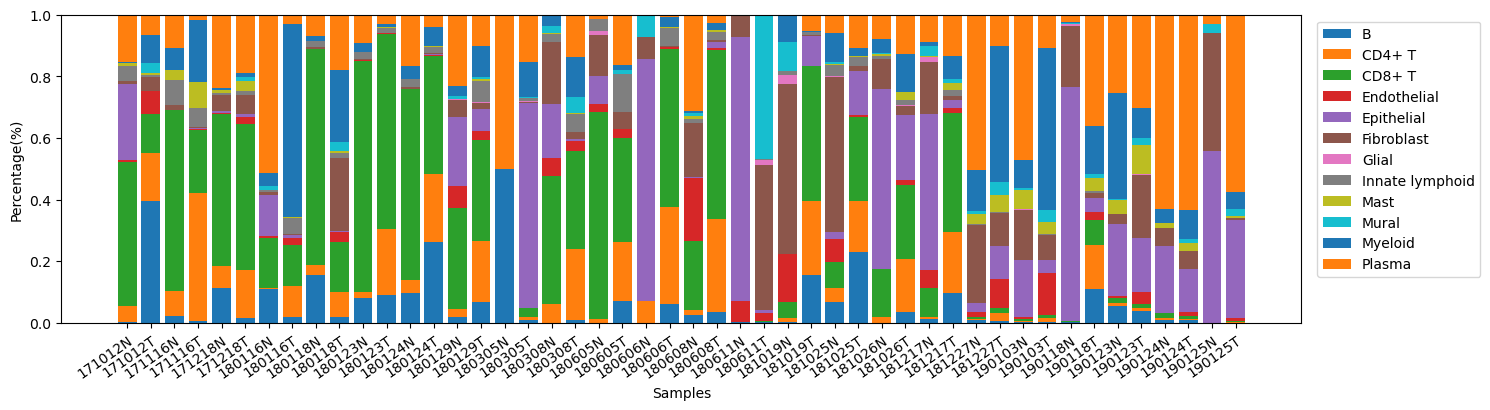

In [29]:
plt.figure(figsize=(16,4))

plt.bar(sample_counts[sample_counts.Type == cluster_name[0]].Sample,
        sample_counts[sample_counts.Type == cluster_name[0]].percent,label = cluster_name[0])
bott = sample_counts[sample_counts.Type == cluster_name[0]].percent
n = 1
for i in cluster_name[1:]:        
        plt.bar(sample_counts[sample_counts.Type == cluster_name[n]].Sample,
                sample_counts[sample_counts.Type == cluster_name[n]].percent,
                bottom = bott,
                label = i)
#方法一       
#         bott = list(map(lambda x :x[0]+x[1],
#                         zip(bott, sample_counts[sample_counts.Type == cluster_name[n]].percent)))

#方法二

        bott = np.array(bott) + np.array(sample_counts[sample_counts.Type == cluster_name[n]].percent)
    
        n = n+1
plt.style()
plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')
plt.ylabel('Percentage(%)')
plt.xlabel('Samples')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1),ncol = 1)
plt.show()

# type collection

In [3]:
adata.obs

,Sample,Patient,Tissue,Platform,Type,Subtype
AAACCTGAGAGTACCG-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P01
AAAGTAGCAAAGGTGC-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P02
ACACCGGCACCAGTTA-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P02
ACAGCTATCAAAGTAG-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P02
ACGCCAGAGAGTACCG-1-171012N,171012N,P171012,Normal,SC3P,Plasma,P01
...,...,...,...,...,...,...
GCGACCATCAATCTCT-1-190124T,190124T,P190124,Tumor,SC5P,B,B12
GTATCTTTCTGACCTC-1-190124T,190124T,P190124,Tumor,SC5P,B,B12
TACAGTGTCGCAAACT-1-190124T,190124T,P190124,Tumor,SC5P,B,B12
TCGGTAATCATCACCC-1-190124T,190124T,P190124,Tumor,SC5P,B,B12


In [30]:
Type_count = adata.obs.groupby(['Type','Patient']).count()[['Sample']]
Type_count = Type_count.rename(columns={'Sample':'Count'})
Type_count

Count
Type   Patient       
B      P171012    742
       P171116     28
       P171218    235
       P180116     56
       P180118    322
...               ...
Plasma P190103   1778
       P190118    719
       P190123    435
       P190124   3050
       P190125    360

[288 rows x 1 columns]

In [31]:
Type_total['Total'] = Type_count.groupby('Type').agg({'Count':'sum'})
Type_total = Type_total[['Total']]
Type_total

,Total
Type,
B,7332
CD4+ T,12905
CD8+ T,31705
Endothelial,3684
Epithelial,7210
Fibroblast,13597
Glial,385
Innate lymphoid,2658
Mast,1340


In [32]:
Type_count = Type_count.merge(Type_total,left_index=True,right_index=True)
Type_count

Count  Total
Type   Patient              
B      P171012    742   7332
       P171116     28   7332
       P171218    235   7332
       P180116     56   7332
       P180118    322   7332
...               ...    ...
Plasma P190103   1778  16883
       P190118    719  16883
       P190123    435  16883
       P190124   3050  16883
       P190125    360  16883

[288 rows x 2 columns]

In [33]:
Type_count['Percent'] = Type_count.Count/Type_count.Total*100
Type_count

Count  Total    Percent
Type   Patient                         
B      P171012    742   7332  10.120022
       P171116     28   7332   0.381888
       P171218    235   7332   3.205128
       P180116     56   7332   0.763775
       P180118    322   7332   4.391708
...               ...    ...        ...
Plasma P190103   1778  16883  10.531304
       P190118    719  16883   4.258722
       P190123    435  16883   2.576556
       P190124   3050  16883  18.065510
       P190125    360  16883   2.132322

[288 rows x 3 columns]

In [49]:
Type_count = Type_count.reset_index()
Patient_name = Type_count.Patient.unique()
Patient_name

['P171012', 'P171116', 'P171218', 'P180116', 'P180118', ..., 'P190103', 'P190118', 'P190123', 'P190124', 'P190125']
Length: 24
Categories (24, object): ['P171012', 'P171116', 'P171218', 'P180116', ..., 'P190118', 'P190123', 'P190124', 'P190125']

In [41]:
Type_name[1:]

['CD4+ T', 'CD8+ T', 'Endothelial', 'Epithelial', 'Fibroblast', ..., 'Innate lymphoid', 'Mast', 'Mural', 'Myeloid', 'Plasma']
Length: 11
Categories (12, object): ['B', 'CD4+ T', 'CD8+ T', 'Endothelial', ..., 'Mast', 'Mural', 'Myeloid', 'Plasma']

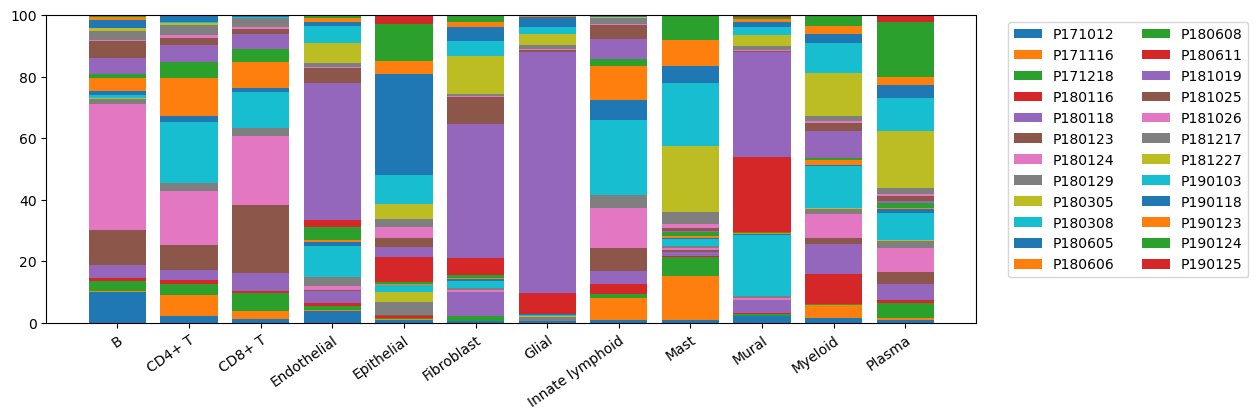

In [55]:
plt.figure(figsize=(12,4))


plt.bar(Type_count[Type_count.Patient ==Patient_name[0]].Type, 
        Type_count[Type_count.Patient ==Patient_name[0]].Percent, label = Patient_name[0])
bott = Type_count[Type_count.Patient ==Patient_name[0]].Percent

for i in Patient_name[1:]:
    plt.bar(Type_count[Type_count.Patient ==i].Type, 
            Type_count[Type_count.Patient ==i].Percent, 
            bottom = bott,
            label = i)
    bott = np.array(bott) + np.array(Type_count[Type_count.Patient ==i].Percent)

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')  
plt.legend(ncol = 2, loc = 'upper right', bbox_to_anchor = (1.3,1))    
plt.show()